# MODEL PROJECT

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Model description

We consider a two period OLG model where we include an Euler equation. 

**Firms maximization problem:**
$$
\max_{K_t, L_t}  AK_t^{\alpha}L_t^{1-\alpha} - r_t K_t - w_t L_t
$$

$L_t$ and $K_t$ is the labor and capital employed by a firm. $A$ is the total factor productivity and must be greater than 0. $\alpha \in (0,1)$ and is the percentage of capital the consumer uses in their production process.

**Production function:**
$$
Y_t = AK_t^{\alpha}L_t^{1-\alpha} 
$$

$L_t$ shows how many individuals are born in period t. The population grows at constant rate, n:
$$
L_t = L_{t-1}(1+n)
$$

The capital accumulation in the next period is equal to the savings from this period:
$$
K_{t+1} = S_t = s_tL_t
$$
It is only the young ($L_t$) who save.

In period $t+1$ aggregate capital stock is equal to what the young people save, what the old people dissave and un-depreciated capital ($\delta = 0$):
$$
k_{t+1}(1+n) = s_t 
$$

**Capital per capita:**
$$
k_t = \frac{K_t}{L_t}
$$

We write up the utility for young individuals.


**Saving problem for an individual:**
$$
U_t = ln(c_{1t})+\beta ln(c_{2t+1})
$$
$c_{1t}$ is consumption when young and $c_{2t+1}$ is consumption when old. 

**Parameter expression:**
$$
\beta = \frac{1}{1+\rho}
$$
$\rho$ is the discount rate andmust be larger than $-1$, such that $\beta>0$.

**Budget constraints:**
$$
c_{1t} + s_t = w_t 
$$

$$
c_{2t+1} = (1 + r_{t+1}) s_t
$$
$w_t$ is defined as the wage rate and $r_{t+1}$ is the interest rate between $t$ and $t+1$.
$\newline$
The consumption for young is equal to their wage minus savings. 
$\newline$
Since old agents do not work, they must provide consumption through savings which are remunerated at the gross rate.  

By combining consumption when young and consumption when old, we yield the **lifetime budget constraint:**
$$
c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t 
$$
The old cannot make any choices and must therefore consume their wealth. 
$\newline$
We assume $\delta = 0$ meaning zero depreciation. By solving the firms' problem we get factor prices for $r_t$ and $w_t$:
$$
r_t = A \alpha k_t^{\alpha-1}
$$

$$
w_t = A(1-\alpha)k_t^\alpha
$$

In order to derive the Euler equation, ie. solving the household problem, we use the Lagrangian to find FOC's. Then we can substitute out the Lagrangian multiplier to get the Euler equation.

**The Euler equation:**
$$
c_{2t+1} = \frac{1+r_{t+1}}{1+\rho}c_{1t}
$$

By combining the budget constraints with the Euler equation, we are able to find the optimal savings. 
$$
s_t = \frac{1}{2+\rho}w_t
$$

Remember that $k_{t+1} (1+n) = s_t$. By inserting the factor price for wage, we get the capital accumulation per capita. 

**Capital accumulation per capita:**
$$
k_{t+1}(1+n) = \frac{1}{2+\rho}w_t
$$

$$
k_{t+1}(1+n) = \frac{1}{2+\rho}A(1-\alpha)k_t^\alpha
$$

$$
k_{t+1} = \frac{A(1-\alpha)k_t^\alpha}{(1+n)(2+\rho)}
$$

In steady state $k_{t+1} = k_t = k^*$ yielding:

**Steady state:**
$$
k^* = \bigr[\frac{A(1-\alpha)}{(1+n)(2+\rho)}\bigr]^\frac{1}{1-\alpha}
$$





## Analytical solution

First step is to solve the model analytically if possible. 

We start of by defining the parameters we use in our function using Sympy. 

Afterwards, we solve for $k^*$ in our capital accumulation function derived above.

Lastly, we turn our function into a python function using Sympy.lambdify.

In [2]:
# Defining parameters as symbols
alpha = sm.symbols('alpha')
A = sm.symbols('A')
k = sm.symbols('k')
rho = sm.symbols('rho')
n = sm.symbols('n')
tau = sm.symbols('tau')

In [3]:
# Solving for steady state using Sympy.solve
steady_state = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
kss = sm.solve(steady_state, k)[0]
kss 

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

In [10]:
kss_ny = ((A*(1-alpha))/((1+n)*(2+rho)))**(-1/(alpha-1))

The expression above is the solution for the steady state. If we rearrange the expression we will obtain the following expression for steady state:
$$
k^* = \bigr[\frac{A(1-\alpha)}{(1+n)(2+\rho)}\bigr]^\frac{1}{1-\alpha}
$$

In [5]:
# Turning our function into a python function using Sympy.lambdify
ss_func = sm.lambdify((rho,A,alpha,n,tau),kss)
ss_func(0.03, 1.00, 0.30, 0.05, 0.00)

0.20377974025150472

## Numerical solution

We start of by defining the values of the parameters. 

We optimize algorithms using the brentq method. 

**Husk at overvej hvilken metode vi skal anvende og argumenter for, hvorfor vi har valgt netop denne metode. Husk også at tjekke for forskellige værdier om der er konvergens.**

In [6]:
# Setting parameters
rho = 0.03
A = 1.00
alpha = 0.30
n = 0.05
tau = 0.00

In [7]:
# Defining the objective
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='brentq') 
result.root

0.20377974025150472

From the giving values of the parameters we find that steady state, $k^*$, is equal to 0.204. $\newline$
It follows that $k_{t+1}$ is a concave function of $k_t$, which means that there will be a unique steady state and we will converge to it. 

In [8]:
# The following code is for the start of the simulation of the model. 
from modelproject import modelclass

model = modelclass()

par = model.par
sim = model.sim

model.sim_results()

# Kan man få fjernet den første del, hvor der står initializing the model? 

initializing the model:
calling .setup()
calling .allocate()
initializing the model:
calling .setup()
calling .allocate()
Consumption by old people in period t = 0 sim.C2[0] =  0.250
Consumption by young in period t = 0 sim.C1[0] =  0.210
Consumption by old people in period t sim.C2[1] =  0.313
Consumption by young people in period t sim.C1[1] =  0.241
euler-error = -2.168
simulation done in 0.005 secs
euler error after model has been simulated 3.2216451728572792e-12


We see that both young and old consume more in period t compared to period 0. The old consume more than the young in both periods. 

The Euler error is $-2.17$ before simulation and $0.000$ after simulating the model. The Euler error shows how close the Euler approximation is to the true result. The model is therefore more correct after simulation than before. Furthermore, we see that there is convergence. 

simulation done in 0.006 secs


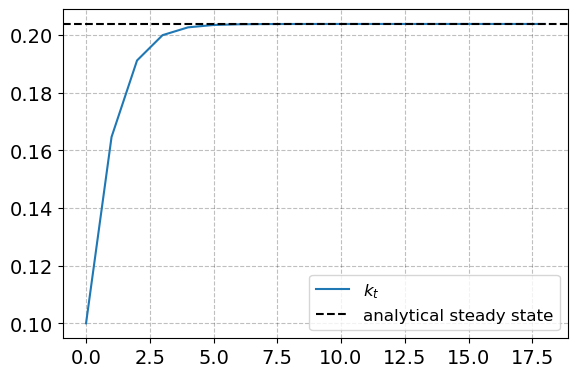

In [13]:
# Calling our simulation and storing new variables 
model.simulate()
k_orig=sim.k.copy()
ss_func_orig = ss_func(0.03, 1.00, 0.30, 0.05, 0.00) 

# a. Plotting
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(k_orig,label=r'$k_{t}$')
ax.axhline(ss_func_orig,ls='--',color='black',label='analytical steady state')
ax.legend(frameon=True,fontsize=12)
fig.tight_layout()
k_orig_old = k_orig.copy()

From the plot we see, that the analytical steady state is a little higher than 0.20, which is the same as the analytical solution found earlier in the assignment. Furthermore, we see that the capital accumulation converges towards steady state. 

In [14]:
par.production_function = 'cobb-douglas'
par.n = 0.9
ss_func_new = ss_func(0.03, 1.00, 0.30, 0.10, 0.00) 

model.simulate()

simulation done in 0.005 secs


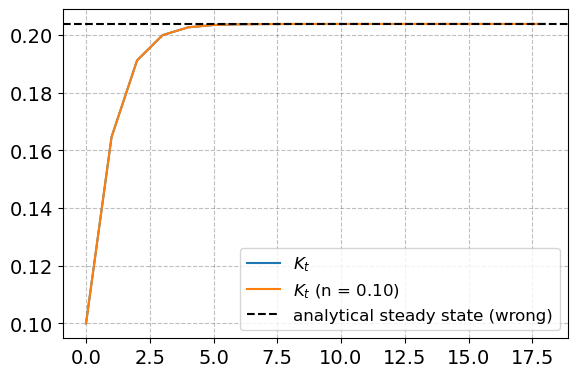

In [16]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(k_orig,label=r'$K_{t}$')
ax.plot(k_orig_old,label=r'$K_{t}$ (n = 0.10)')
ax.axhline(kss_ny,ls='--',color='black',label='analytical steady state (wrong)')
#ax.axhline(ss_func_new,ls='--',color='black',label='analytical steady state (wrong)')
ax.legend(frameon=True,fontsize=12)
fig.tight_layout()

# Further analysis

We now want to expand our model where we look at different rates for population growth (n). 

In [17]:
ns = [0.00, 0.03, 0.05, 0.07, 0.09, 0.10]

# Creating an empty list to store the values of steady state
solution = []

for n in ns: 
    f_a = lambda k1: ((1-alpha)*k1**alpha)/((1+n)*(2+rho))
    #f_b = lambda k2: (1+n)*f_a(k2)
    f_c = lambda k3: k3 - f_a(k3)
    res = optimize.root_scalar(f_c,bracket=[1e-10,10],method='brentq') # i py-filen bruger han bisect?
    solution.append(res.root)
    print(f'Population grotwh at {n:}: = {res.root :.3f}')


Population grotwh at 0.0: = 0.218
Population grotwh at 0.03: = 0.209
Population grotwh at 0.05: = 0.204
Population grotwh at 0.07: = 0.198
Population grotwh at 0.09: = 0.193
Population grotwh at 0.1: = 0.191


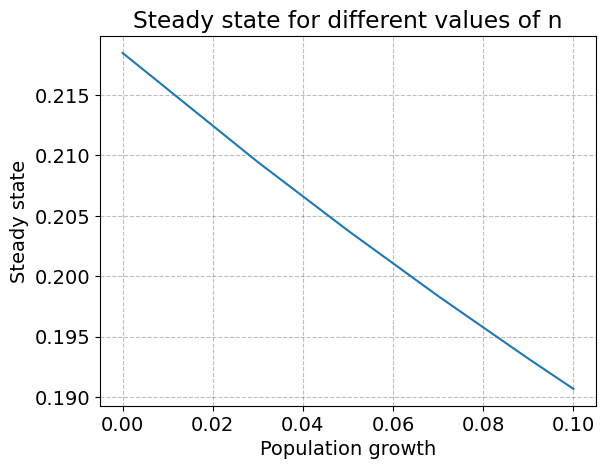

In [18]:
# Creating figure
def plot_n():
    fig = plt.figure()

    # Creating the plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ns, solution)

    # Add labels and title
    ax.set_title('Steady state for different values of n')
    ax.set_xlabel('Population growth')
    ax.set_ylabel('Steady state')

# Print
plot_n()

simulation done in 0.007 secs


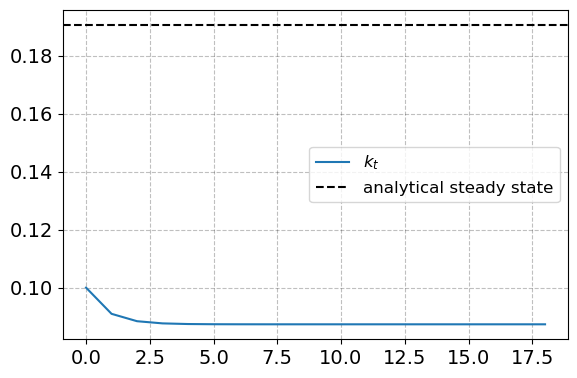

In [19]:
# OBS!! Enten skal denne slettes eller koden nedenunder, der også forsøger at lave et plot! 

# Calling our simulation and storing new variables for n = 0.10
model.simulate()
k_orig1=sim.k.copy()
ss_func_orig1 = ss_func(0.03, 1.00, 0.30, 0.10, 0.00) 

# a. Plotting
fig1 = plt.figure(figsize=(6,6/1.5))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(k_orig1,label=r'$k_{t}$')
ax1.axhline(ss_func_orig1,ls='--',color='black',label='analytical steady state')
ax1.legend(frameon=True,fontsize=12)
fig1.tight_layout()
k_orirg1_old = k_orig1.copy()

From the plot above we see that as $\tau$ is increasing the steady state for capital is decreasing. 

One explanation for this is that when young poeple have to pay a larger fraction of their wage to the old people in the same period, the young people then have a smaller incentive to work and therefore the overall capital will decrease. 

# Conclusion

From the analysis above we see that, when there is no population growth ($n = 0$), we find steady state to be 0.0125 for $\tau = 0.4$. $\newline$
When we then change the population growth, such that $n = 0.5$ we find that the steady state increases for $\tau = 0.4$, such that steady state now is 0.0237. 

This is in accordance to what we expect since when the population is growing, there will be more young people to work and therefore, the steady state value for capital will increase as well. 